<a href="https://colab.research.google.com/github/redjules/deepface/blob/main/Deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using Deepface

1. Face Detectors
2. Face Recognition and verification
3. Similarity
4. Facial Attribute Analysis
5. Real Time Analysis

In [88]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2 as cv


1. Face detection

In [89]:

#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/antonio_banderas.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [90]:

#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/brad_pitt.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [91]:
face = DeepFace.extract_faces("/content/Antonio_Banderas-2000.jpg",
                              target_size=(224,224),
                              detector_backend='opencv')
face

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

Original image

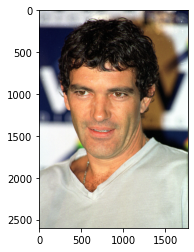

In [92]:
img = cv.imread('/content/Antonio_Banderas-2000.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # Repair format because cv2 reads images as BGR instead of RGB
plt.imshow(img)

Focused face

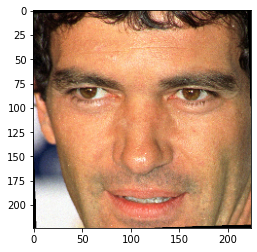

In [93]:
plt.imshow(face[0]['face'])

Compare Detection Backends

In [94]:
backends = ['opencv','ssd','dlib','mtcnn','retinaface','mediapipe']

1/1 [==============================] - 0s 60ms/step


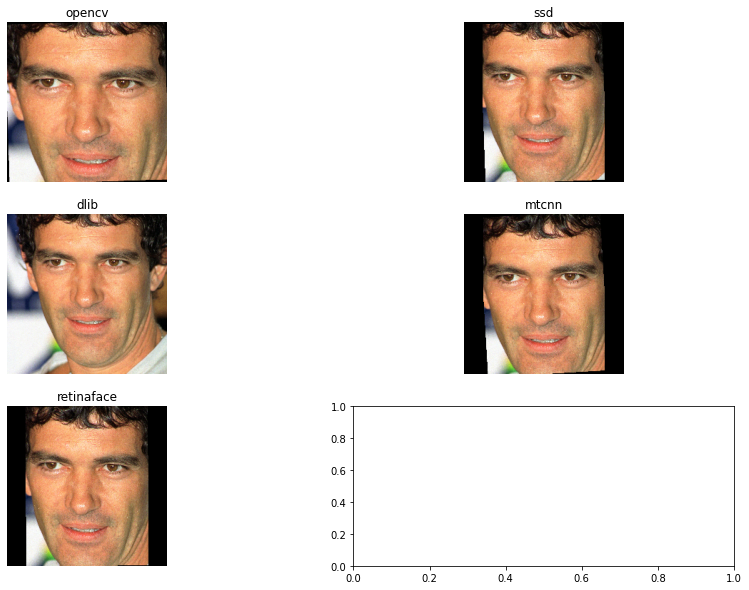

In [95]:
fig,axs = plt.subplots(3,2,figsize=(15,10))
axs= axs.flatten()

for i, backend in enumerate(backends):
  try:
    face = DeepFace.extract_faces("/content/Antonio_Banderas-2000.jpg",
                              target_size=(224,224),
                              detector_backend= backend)
    axs[i].imshow(face[0]['face'])
    axs[i].set_title(backend)
    axs[i].axis('off')
  except:
    pass
plt.show()

1/1 [==============================] - 0s 30ms/step


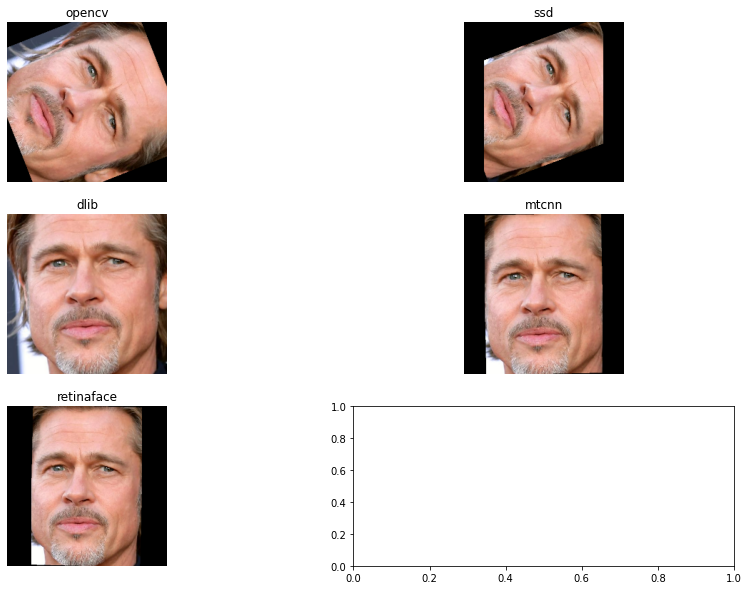

In [96]:
fig,axs = plt.subplots(3,2,figsize=(15,10))
axs= axs.flatten()

for i, backend in enumerate(backends):
  try:
    face = DeepFace.extract_faces("/content/brad_pitt_.jpeg",
                              target_size=(224,224),
                              detector_backend= backend)
    axs[i].imshow(face[0]['face'])
    axs[i].set_title(backend)
    axs[i].axis('off')
  except:
    pass
plt.show()

Face Verification

In [97]:
models = [
    'VGG-Face',
    'Facenet',
    'Facenet512',
    'OpenFace',
    'DeepFace',
    'DeepID',
    'ArcFace',
    'Dlib',
    'SFace']

    
result = DeepFace.verify(img1_path = '/content/antonio-banderas--6219520-.jpg',
                         img2_path = '/content/antonio-banderas-cannes-film-fest-1995-getty.jpg', 
                         model_name = models[1])

In [98]:
result

{'verified': False,
 'distance': 0.511844683859288,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 218, 'y': 326, 'w': 490, 'h': 490},
  'img2': {'x': 1243, 'y': 745, 'w': 1050, 'h': 1050}},
 'time': 10.36}

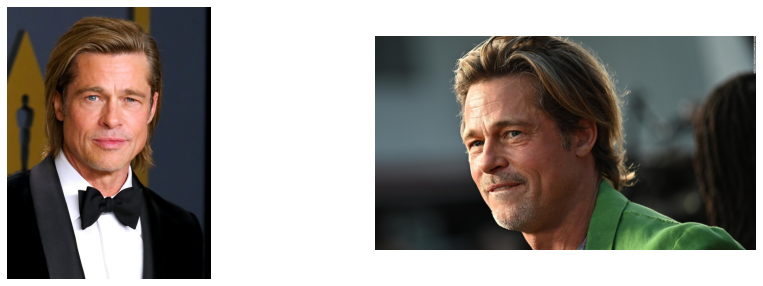

Verified True - Distance 0.3342: Model VGG-Face
Verified False - Distance 0.6033: Model Facenet
Verified True - Distance 0.2321: Model Facenet512
Verified False - Distance 0.3311: Model OpenFace
Verified False - Distance 0.4205: Model DeepFace
Model DeepID failed
Verified True - Distance 0.4961: Model ArcFace
Model Dlib failed
Verified False - Distance 0.7832: Model SFace


In [106]:
#face verification
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].imshow(plt.imread('/content/1374948.jpg'))
axs[1].imshow(plt.imread('/content/220922043726-03-brad-pitt-skincare-full-169.jpg'))
axs[0].axis('off')
axs[1].axis('off')
plt.show()

for model in models:
    try:
      result = DeepFace.verify(
          img1_path = '/content/1374948.jpg',
          img2_path = '/content/220922043726-03-brad-pitt-skincare-full-169.jpg', 
          model_name = model)

      print(f"Verified {result['verified']} - Distance {result['distance']:0.4}: Model {model}")

    except:
      print(f"Model {model} failed")


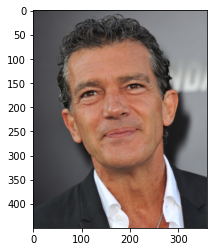

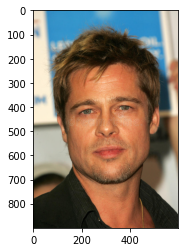

In [107]:
plt.imshow(plt.imread('/content/antonio-banderas-medium.jpg'))
plt.show()
plt.imshow(plt.imread('/content/brad-pitt-26357464.jpg'))
plt.show()

## Face Recognition

In [109]:
result = DeepFace.find(img_path='/content/brad-pitt-26357464.jpg', db_path='/content/', enforce_detection = False)
result              

There are  353  representations found in  representations_vgg_face.pkl
find function lasts  3.25126051902771  seconds


[                                              identity  source_x  source_y  \
 0                     /content//brad-pitt-26357464.jpg       106       253   
 1    /content//rs_1024x759-200210102128-1024-Brad-P...       106       253   
 2    /content//Brad-Pitt-shutterstock_editorial_924...       106       253   
 3                               /content//images38.jpg       106       253   
 4                             /content//MFH-HERO-2.jpg       106       253   
 ..                                                 ...       ...       ...   
 120  /content//brad_pitt___25_clich__s_vintage_de_1...       106       253   
 121                             /content//images40.jpg       106       253   
 122                     /content//antonio-banderas.jpg       106       253   
 123            /content//brad-pitt-elle-1663792051.jpg       106       253   
 124  /content//Salma-Hayek-Antonio-Banderas-Puss-in...       106       253   
 
      source_w  source_h  VGG-Face_cosine  
 0    

## Facial Attribute Analysis

In [110]:
result = DeepFace.analyze(img_path='/content/brad-pitt-26357464.jpg')

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]


In [111]:
result

[{'emotion': {'angry': 0.7627720478922129,
   'disgust': 0.07380725583061576,
   'fear': 1.7497381195425987,
   'happy': 7.605644315481186,
   'sad': 4.88416813313961,
   'surprise': 0.009245424735127017,
   'neutral': 84.91462469100952},
  'dominant_emotion': 'neutral',
  'region': {'x': 106, 'y': 253, 'w': 409, 'h': 409},
  'age': 31,
  'gender': {'Woman': 0.0012485634215408936, 'Man': 99.99874830245972},
  'dominant_gender': 'Man',
  'race': {'asian': 10.750326722821388,
   'indian': 3.0890684617676185,
   'black': 0.902342781890299,
   'white': 43.62498001754522,
   'middle eastern': 15.662443260855285,
   'latino hispanic': 25.97083437790461},
  'dominant_race': 'white'}]

In [112]:
import pandas as pd

<Axes: >

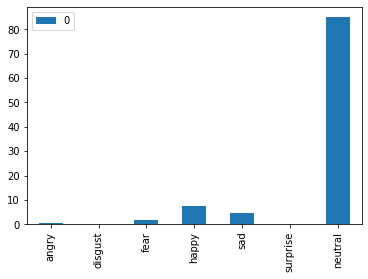

In [113]:
pd.DataFrame(result[0]['emotion'], index=[0]).T.plot(kind='bar')

Run Facial Attribute Analysis on my Images

In [114]:
from glob import glob

In [121]:
def plot_img_emotion(img,emo_df,figsize=(15,5)):
  img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
  fig,axs=plt.subplots(1,2,figsize=figsize)
  axs[0].axis('off')
  axs[0].imshow(img)
  emo_df.sort_values('prediction').plot(kind='barh',figsize=figsize,ax=axs[1])
  plt.tight_layout()
  plt.show()

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


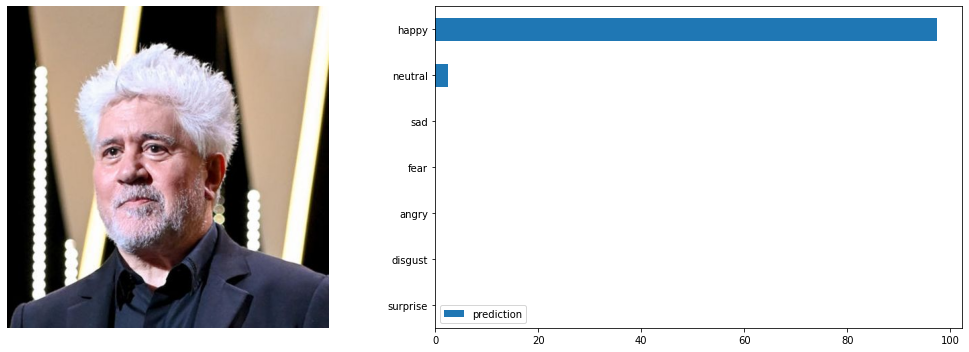

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


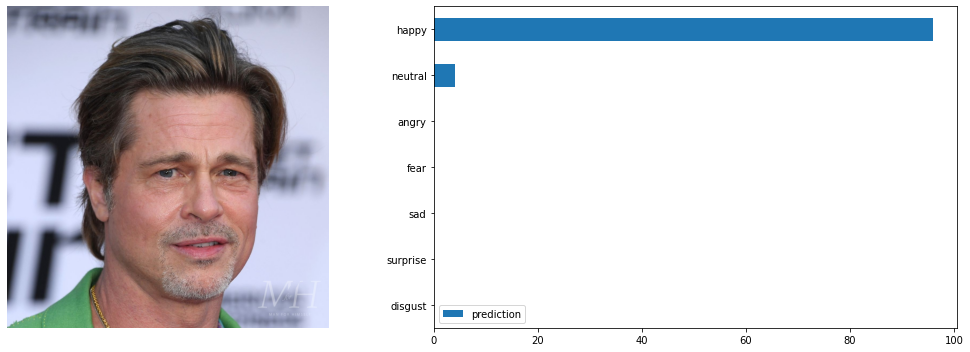

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


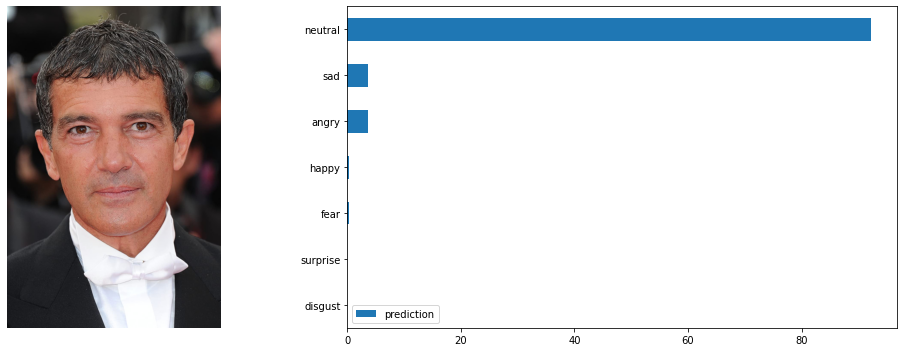

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]


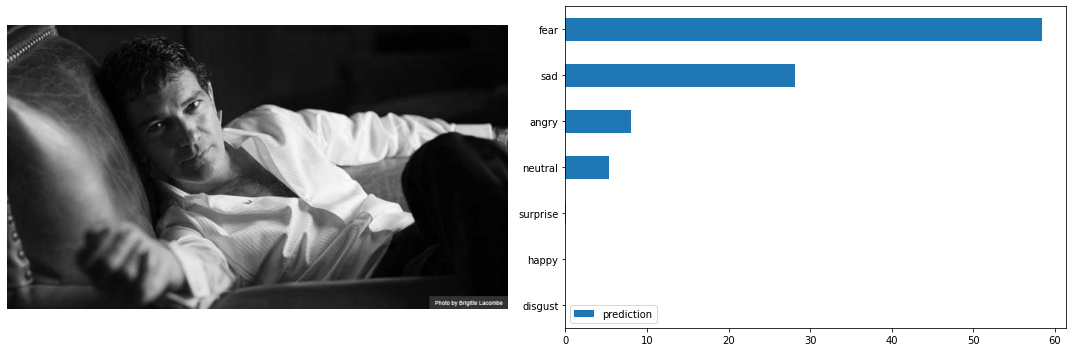

In [123]:
imgs = glob("/content/*")

for imgPath in imgs[:4]:   # Do only the first 4 for now
  img = cv.imread(imgPath)
  result = DeepFace.analyze(img_path=img,
                            detector_backend=backends[4])

  emo_df=pd.DataFrame(result[0]["emotion"], index=[0]).T.rename(
      columns={0:"prediction"}
  )
  plot_img_emotion(img, emo_df)
  plt.show()

# Streaming API

In [126]:
DeepFace.stream(db_path='/content/', source=0)

facial recognition model VGG-Face is just built
Age model is just built
Gender model is just built
Emotion model is just built
There are  353  representations found in  representations_vgg_face.pkl
find function lasts  1.1217565536499023  seconds
